# Exploring Ebay Car Sales Data


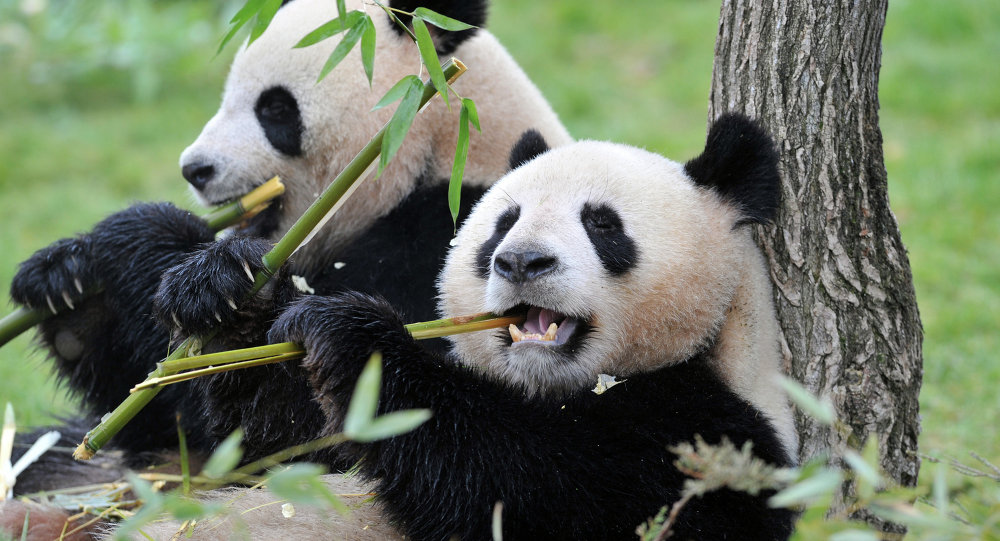


` The main goal this project - define corrects limits different values and get correct statistics from the  dataset`

## Introduction



The our dataset contains data about offered for sale used cars from *eBay Kleinanzeigen*, a    <a href="https://en.wikipedia.org/wiki/Classified_advertising" target="_blank"> classifieds </a> section of the German eBay website. This dataset was originally scraped and uploaded to Kaggle by user <a href="https://www.kaggle.com/orgesleka " target="_blank">orgesleka</a>. The original dataset isn't available on Kaggle anymore, but you can find it <a href="https://data.world/data-society/used-cars-data" target="_blank"> here.</a>
The goal of my works - analyze data with this dataset and examine general trends if its are.
### Importing the modules and opening the file


In [1]:
# Import required modules - pandas and numpy
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read the 'autos.csv' file as 'autos'
autos = pd.read_csv("data/autos.csv", encoding = "Latin-1")

# Pring first five rows
print(autos.head()) 

# get general information about data set
autos.info()

# check that data set hasn't index column from dataset
autos.index

           dateCrawled                                               name  \
0  2016-03-26 17:47:46                   Peugeot_807_160_NAVTECH_ON_BOARD   
1  2016-04-04 13:38:56         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  2016-03-26 18:57:24                         Volkswagen_Golf_1.6_United   
3  2016-03-12 16:58:10  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4  2016-04-01 14:38:50  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   

   seller offerType   price   abtest vehicleType  yearOfRegistration  \
0  privat   Angebot  $5,000  control         bus                2004   
1  privat   Angebot  $8,500  control   limousine                1997   
2  privat   Angebot  $8,990     test   limousine                2009   
3  privat   Angebot  $4,350  control  kleinwagen                2007   
4  privat   Angebot  $1,350     test       kombi                2003   

     gearbox  powerPS   model   odometer  monthOfRegistration fuelType  \
0    manuell      158  andere 

RangeIndex(start=0, stop=50000, step=1)

As we see:
* name of  some columns are  hard for reading.
* some columns have NAN values because number non-null values not equal 50000.
* not all required  us for possible sorting and etc. procedures  values in the columns how "odometr" "price" "lastseen" and others haven't digital format.  


## Rename columns and prepare data for further   analyzing
get name of columns:

In [2]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

and manual rename it with calling rename() function, also rename 'price' to the 'price_usd' and 'odometer' to 'odometer_km'

In [3]:
autos.rename({'dateCrawled':'date_crawled', 'offerType':'offer_type', 'price':'price_usd', 
              'vehicleType':'vehicle_type', 'yearOfRegistration':'registration_year', 'powerPS':'power_ps', 
              'odometer':'odometer_km', 'monthOfRegistration':'registration_month', 'fuelType':'fuel_type', 
              'notRepairedDamage':'unrepaired_damage', 'dateCreated':'ad_created', 
              'nrOfPictures':'nr_of_pictures', 'postalCode':'postal_code', 
              'lastSeen':'last_seen'}, axis=1, inplace=True)

and checkj it:

In [4]:
autos.head()

,date_crawled,name,seller,offer_type,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Determinate required values.
Let's look  on data in our dataset with descibe() function. 

In [5]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 19:48:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


as we see:
* 'nr_of_pictures' has only one value 0 (as its std, min, and max are equal to 0). 'seller' and 'offer_type' have two values (the count of the first value is 49999 and the count of the second one is only  - they can to drop as . We can  remove the 'nr_of_pictures' column. We can remove 'seller' and 'offer_type because they haven't almost no unique values.
* 'price' and 'odometer' store numeric data as a text and does not allow us to analyze this data as numeric data (does not allow us to find their min, max, std) - I think that we must  convert its values to integer.
* registration_year', 'power_ps', 'registration_month', and 'postal code' need more investigation as their number of unique values cannot be defined. Now they are equal to NaN because their dtype is 'int64' - the '.describe()' method is not capable of finding unique values of numeric values and because we convert it to integer.

Lets estimate range and format  of values in columns   'odometer_km' and 'price' for determinate  the conversion criterion.

In [6]:
s = autos['odometer_km'].unique()
print("odometer_km", s, s.shape, sep = "\n") 

p = autos['price_usd'].unique()
print("\nprice_usd", p, p.shape, sep = "\n")

y = autos['registration_year'].unique()
print("\nregistration_year", y, y.shape, sep = "\n")

odometer_km
['150,000km' '70,000km' '50,000km' '80,000km' '10,000km' '30,000km'
 '125,000km' '90,000km' '20,000km' '60,000km' '5,000km' '100,000km'
 '40,000km']
(13,)

price_usd
['$5,000' '$8,500' '$8,990' ... '$385' '$22,200' '$16,995']
(2357,)

registration_year
[2004 1997 2009 2007 2003 2006 1995 1998 2000 2017 2010 1999 1982 1990
 2015 2014 1996 1992 2005 2002 2012 2011 2008 1985 2016 1994 1986 2001
 2018 2013 1972 1993 1988 1989 1967 1973 1956 1976 4500 1987 1991 1983
 1960 1969 1950 1978 1980 1984 1963 1977 1961 1968 1934 1965 1971 1966
 1979 1981 1970 1974 1910 1975 5000 4100 2019 1959 9996 9999 6200 1964
 1958 1800 1948 1931 1943 9000 1941 1962 1927 1937 1929 1000 1957 1952
 1111 1955 1939 8888 1954 1938 2800 5911 1500 1953 1951 4800 1001]
(97,)


let's begin optimization data set.
## 1. Remove columns haven't statistical values. 

In [7]:
autos.drop(columns = ['nr_of_pictures','seller','offer_type'], inplace=True)
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   price_usd           50000 non-null  object
 3   abtest              50000 non-null  object
 4   vehicle_type        44905 non-null  object
 5   registration_year   50000 non-null  int64 
 6   gearbox             47320 non-null  object
 7   power_ps            50000 non-null  int64 
 8   model               47242 non-null  object
 9   odometer_km         50000 non-null  object
 10  registration_month  50000 non-null  int64 
 11  fuel_type           45518 non-null  object
 12  brand               50000 non-null  object
 13  unrepaired_damage   40171 non-null  object
 14  ad_created          50000 non-null  object
 15  postal_code         50000 non-null  int64 
 16  last_seen           50

## 2. Convert text values  to integer in columns 'price_usd' and 'odometr_km'

In [8]:
autos['price_usd'] = autos['price_usd'].str.replace(',','').str.replace('$','').astype('int64')
autos['odometer_km'] = autos['odometer_km'].str.replace('km','').str.replace(',','').astype('int64')
autos[['odometer_km', 'price_usd', 'registration_year', 'power_ps' ]].describe()

,odometer_km,price_usd,registration_year,power_ps
count,50000.000000,5.000000e+04,50000.000000,50000.000000
mean,125732.700000,9.840044e+03,2005.073280,116.355920
std,40042.211706,4.811044e+05,105.712813,209.216627
min,5000.000000,0.000000e+00,1000.000000,0.000000
25%,125000.000000,1.100000e+03,1999.000000,70.000000
50%,150000.000000,2.950000e+03,2003.000000,105.000000
75%,150000.000000,7.200000e+03,2008.000000,150.000000
max,150000.000000,1.000000e+08,9999.000000,17700.000000


Lets analyze these values:
* 1. How we see before  and now range of values in  odometr_km have limited artificial discrete values set - from 5.000 to 150.000 km and very limited,  and dispersions have only 13 values. Practical life cycle mileage for   auto 1990 - 2000 years not less than 200.000 km for gasoline engine and not less 300.000 km for diesel engine, but we have max mileage 150.000 km which less practical life cycle  limit of mileage. Statistical pattern based in this column will not  descriptive and reliable for dataset with 50.000 rows - we can delete reliable information for other columns and dot get reliable pattern.
* 2. Practical values  for defining outliers have data only  in these columns - price_usd, reqistration_year and power_ps which have large dispersion of data from max and min values - for exampe registration year from 1000 to 9999, price 100M usd  and etc.

Lets calculate IQR for these values

In [9]:
irq_reg_year = autos['registration_year'].quantile(0.75) -  autos['registration_year'].quantile(0.25)
print('IRQ reg_year =', irq_reg_year)

irq_power_ps = autos['power_ps'].quantile(0.75) -  autos['power_ps'].quantile(0.25)
print('\nIRQ power_ps = ', irq_power_ps)

irq_price_usd = autos['price_usd'].quantile(0.75) -  autos['price_usd'].quantile(0.25)
print('\nIRQ price_usd = ', irq_price_usd)

IRQ reg_year = 9.0

IRQ power_ps =  80.0

IRQ price_usd =  6100.0


Remember the general rules about outlier values:
* 1. Low outlier limit = Q1 (25%) - 1.5xIQR 
* 2. High outlier limit = Q3(75%) + 1.5xIQR
Formally if we hence this formulas we can get next paradox values - negative power, negative price,  2021 year registration and etc. Hence for define reliable limit  we will operate real values in some case. 

Before estimate high outlier limit for years see to max and min values for  'date_crawled' and 'ad_created' columns for understanding time of publication of data:

In [10]:
ad_created_max = max(pd.to_datetime(autos['ad_created']))
ad_created_min = min(pd.to_datetime(autos['ad_created']))
print("ad_created_max = ", ad_created_max, ", ad_created_min = ", ad_created_min )

date_crawled_max = max(pd.to_datetime(autos['date_crawled']))
date_crawled_min = min(pd.to_datetime(autos['date_crawled']))
print("\ndate_crawled_max = ",date_crawled_max, ", date_crawled_min", date_crawled_min )

ad_created_max =  2016-04-07 00:00:00 , ad_created_min =  2015-06-11 00:00:00

date_crawled_max =  2016-04-07 14:36:56 , date_crawled_min 2016-03-05 14:06:30


**Define high and  low outlier limits  for year, power and price:**

**1.Define low and high outlier limit for 'registration_year':**

for low limit use formula

**year_low_limit = 1999 - 1,5 * 9 = 1985** (round down) 

For defining high limit we see time period, see above, for sale advertisements in the dataset - from June 2015 from April 2016. We know that automaker  write in the vehicle registration certificate  real date of manufacturing, hense a high outlier limit can't be greater than 2016 years. 

**year_high_limit = 2016**

**2.Define low and high outlier limit for 'power_ps':**

If we formaly use formula we get **-50 ps** and row 'power_ps' contains and zero value.
Extract unque values from 'power_ps' column and sorted its.

In [11]:
power = sorted(autos['power_ps'].unique())
print (power[0:10])

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10]


Assignment values that doesn't equal zero and higher than -50 ps

**power_low_limit = 1**

for define high limit use formula

**power_high_limit = 150 + 80 * 1,5 = 270**

NB. A little power 

**3.Define low and high outlier limit for 'price_usd':**

If we use formula we get low limit outlier ~ - 8 000 usd. Use real minimal value that doesn't equal zero. 

In [12]:
price = sorted(autos['price_usd'].unique()) 
print(price[0:10])

[0, 1, 2, 3, 5, 8, 9, 10, 11, 12]


so define:

**price_low_limit = 1**

for high limit outlier use formula:

**price_high_limit = 7200 + 6100 * 1,5 = 16350 **


## Removing outliers from 'registration_year', 'power_ps' and 'price_usd'.

We define low and high limits for necessary values and let's modify autos data set. Create copy  current autos and  assignment it name 'autos_raw_copy" and extract data without outliers by some steps.
clear year. Print autos_raw_copy for further comparison.

In [13]:
autos_raw_copy = autos.copy()
autos_raw_copy[['odometer_km', 'price_usd', 'registration_year', 'power_ps' ]].describe()

,odometer_km,price_usd,registration_year,power_ps
count,50000.000000,5.000000e+04,50000.000000,50000.000000
mean,125732.700000,9.840044e+03,2005.073280,116.355920
std,40042.211706,4.811044e+05,105.712813,209.216627
min,5000.000000,0.000000e+00,1000.000000,0.000000
25%,125000.000000,1.100000e+03,1999.000000,70.000000
50%,150000.000000,2.950000e+03,2003.000000,105.000000
75%,150000.000000,7.200000e+03,2008.000000,150.000000
max,150000.000000,1.000000e+08,9999.000000,17700.000000


**Clean year:**

In [14]:
autos= autos[autos['registration_year'].between(1985, 2016)]
autos[['odometer_km', 'price_usd', 'registration_year', 'power_ps' ]].describe()

,odometer_km,price_usd,registration_year,power_ps
count,47215.000000,4.721500e+04,47215.000000,47215.000000
mean,126118.288679,9.103618e+03,2003.319814,117.634650
std,39607.366404,4.836483e+05,6.035886,196.367757
min,5000.000000,0.000000e+00,1985.000000,0.000000
25%,125000.000000,1.111000e+03,1999.000000,75.000000
50%,150000.000000,2.950000e+03,2003.000000,109.000000
75%,150000.000000,7.250000e+03,2008.000000,150.000000
max,150000.000000,1.000000e+08,2016.000000,17700.000000


As wee see  **2 785 records ( -5.57% from original )** are outliers by year. 

**Clean power_ps:**

In [15]:
autos= autos[autos['power_ps'].between(1, 270)]
autos[['odometer_km', 'price_usd', 'registration_year', 'power_ps' ]].describe()

,odometer_km,price_usd,registration_year,power_ps
count,41045.000000,4.104500e+04,41045.000000,41045.000000
mean,126401.266902,8.942654e+03,2003.420563,119.698648
std,38795.620424,5.153831e+05,5.950197,47.966269
min,5000.000000,0.000000e+00,1985.000000,1.000000
25%,125000.000000,1.250000e+03,1999.000000,80.000000
50%,150000.000000,3.100000e+03,2003.000000,115.000000
75%,150000.000000,7.300000e+03,2008.000000,150.000000
max,150000.000000,1.000000e+08,2016.000000,270.000000


As wee see  **6 170 records (-12.34% from original )** are outliers by power_ps.

**Clean price_usd':**

In [16]:
autos= autos[autos['price_usd'].between(1, 16350)]
autos[['odometer_km', 'price_usd', 'registration_year', 'power_ps' ]].describe()

,odometer_km,price_usd,registration_year,power_ps
count,37486.000000,37486.000000,37486.000000,37486.000000
mean,130087.632716,4247.285413,2002.919063,115.380329
std,35291.177041,3849.517064,5.657016,45.229916
min,5000.000000,1.000000,1985.000000,1.000000
25%,125000.000000,1214.250000,1999.000000,75.000000
50%,150000.000000,2900.000000,2003.000000,109.000000
75%,150000.000000,6300.000000,2007.000000,143.000000
max,150000.000000,16350.000000,2016.000000,270.000000


As wee see  ** 3 559 records (-7.12% from original )** are outliers by price_usd.

**As result  12514 records (-25.03% from original) are outliers  by year, power and price**

check cleaned dataset

In [17]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37486 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        37486 non-null  object
 1   name                37486 non-null  object
 2   price_usd           37486 non-null  int64 
 3   abtest              37486 non-null  object
 4   vehicle_type        36062 non-null  object
 5   registration_year   37486 non-null  int64 
 6   gearbox             36822 non-null  object
 7   power_ps            37486 non-null  int64 
 8   model               36098 non-null  object
 9   odometer_km         37486 non-null  int64 
 10  registration_month  37486 non-null  int64 
 11  fuel_type           35431 non-null  object
 12  brand               37486 non-null  object
 13  unrepaired_damage   31858 non-null  object
 14  ad_created          37486 non-null  object
 15  postal_code         37486 non-null  int64 
 16  last_seen           37

Formally we can remove contains null records in other columns, but considering free style 
sale advertisements in case eBay Kleinanzeigen it will be redundant - we get reliable dataset based of year registration, price and power that contains non zero values.
Think which values have real significance for further analyzing:

* 1. date_crawled - have litle time period - one month and we can't understand any statistical pattern.
* 2. ad_created  - have normal time period - nearly ten month and we can understand dispersion movement of sale advertisements by  and define how long sell cars from date of  publication sale advertisement.
* 3. Mileage - have a little series of thirteen why then fixed values - not enough for create authentic distortion.
* 4. Top brands and mean price for brands and registration year - we can create authentic pattern use these values.

**Summary, we analyze next values:
1. Dispersion for ad_created.
2. Disperion by year registration car 
2. Top brands and their mean price, registration year and price.

## Dispersion for ad_created


In [18]:
# Exract datetime valies
year_month_dt = pd.to_datetime(autos['ad_created'])

# Convert to string Month Year
year_month_str = year_month_dt.dt.strftime('%B, %Y')

# Create dictionary
month_year_dic = {}
for value in year_month_str:
    
    if value not in month_year_dic:
        month_year_dic[value] = 1
    else:
        month_year_dic[value] += 1

# Convert dictionary to lists
month_year = []
values = []
for k, v in month_year_dic.items ():
    month_year.append(k)
    values.append(v)

# Convert list to dataframe
month_year_df = pd.DataFrame(list(zip(month_year, values)), 
                             columns =['Month, Year', 'Ad numbers'])

# Calculate sum of column Ad numbers  
total = month_year_df['Ad numbers'].sum()

# Add new column Percent
month_year_df['Percents %'] = month_year_df['Ad numbers'] / total

# Sort by descending
month_year_df.sort_values(by =['Percents %'], ascending = False)

# Format output for dataframe
month_year_df.style.format({"Ad numbers":"{:,}", "Percents %":"{:.3%}"})

,"Month, Year",Ad numbers,Percents %
0,"March, 2016","31,403",83.773%
1,"April, 2016","6,019",16.057%
2,"February, 2016",52,0.139%
3,"January, 2016",7,0.019%
4,"November, 2015",1,0.003%
5,"August, 2015",1,0.003%
6,"December, 2015",2,0.005%
7,"September, 2015",1,0.003%


Remember that ad_created_max =  07 April 2016  and ad_created_min =  11 June 2015.
**As we see  in average car sells didn't more  than two month.** 


## Dispersion by registration year

In [19]:
# Extract values from column 'registration_year'
reg_year = autos['registration_year']

#Create dictionary reg_year_dic = {}
reg_year_dic = {}
for value in reg_year:
    
    if value not in reg_year_dic:
        reg_year_dic[value] = 1
    else:
        reg_year_dic[value] += 1

# Calculate sum of values
total = sum(reg_year_dic.values())
year = []
values = []
for k, v in reg_year_dic.items ():
    year.append(k)
    values.append(v)

# Convert list to dataframe
year_df = pd.DataFrame(list(zip(year, values)), 
                             columns =['Year reg', 'Ad numbers'])

# Calculate sum of column Ad numbers  
total = year_df['Ad numbers'].sum()

# Sort by descending
year_df.sort_values(by = ['Ad numbers'], inplace = True, ascending=False)

# Add new column Percent
year_df['Percents %'] = year_df['Ad numbers'] / total 

year_df.style.format({"Ad numbers":"{:,}", "Percents %":"{:.3%}"})

,Year reg,Ad numbers,Percents %
8,1999,"2,516",6.712%
14,2000,"2,494",6.653%
19,2005,"2,452",6.541%
10,2003,"2,408",6.424%
3,2006,"2,408",6.424%
0,2004,"2,403",6.410%
22,2001,"2,346",6.258%
13,2002,"2,205",5.882%
5,1998,"2,070",5.522%
2,2007,"1,958",5.223%


as we see, **76.18%**  offering for sale  cars made in **1997 - 2009 years**.

## Define most popular automaker in German market

Get 15 top brand list

In [20]:
autos['brand'].value_counts().head(15).sort_values(ascending=False)

volkswagen       8182
opel             4337
bmw              3943
mercedes_benz    3118
audi             2970
ford             2736
renault          1857
peugeot          1235
fiat             1021
seat              743
skoda             681
mazda             628
smart             584
citroen           567
nissan            567
Name: brand, dtype: int64

Us we see most offering for sale cars making the **The big German Car Trinity - VAG (it owned also trade marks Audi, Seat, Scoda, Porsche), BMW and  Mersedes-Benz**.

## Dispersion the mean price, power and make year for cars

Us we know, mileage contain discrete and for my opinion artificial  values, because I examine mean values for price, power and made year for these brands. I don't use dictionary but use their idea for creating little dataframe. Let's begin:

In [21]:
# Creating a list of list of brands for mean price, power and make year 
agregate = []
for brand in autos['brand'].value_counts().head(15).index:
    row_list = []
    row_list.append(brand)
    row_list.append(int(round(autos[autos['brand'] == brand]
                          ['price_usd'].mean(), 0)))
    row_list.append(int(round(autos[autos['brand'] == brand]
                          ['power_ps'].mean(), 0)))
    row_list.append(int(round(autos[autos['brand'] == brand]
                          ['registration_year'].mean(), 0)))
    agregate.append(row_list)

# Convert list of list to dataframe
agregate_df = pd.DataFrame.from_records(agregate)

# Assign name of columns
agregate_df.columns = ["Brand", "Price", "Power PS", "Made year"]

# Descending sort by price 
agregate_df.sort_values(by =['Price'], ascending = False, inplace = True)

# Custom format to price
agregate_df.style.format({"Price":"{:,}"})

,Brand,Price,Power PS,Made year
4,audi,"5,842",151,2003
10,skoda,"5,833",104,2007
2,bmw,"5,707",159,2002
3,mercedes_benz,"5,206",147,2002
0,volkswagen,"4,348",102,2002
14,nissan,"4,013",99,2003
9,seat,"3,965",94,2004
12,smart,"3,746",63,2006
11,mazda,"3,745",118,2003
13,citroen,"3,657",95,2005


We see dispersion by price. As we see brands Audi, BMW and Mersedes-Benz are the most expensive (with almost the same years of make). Lets see dispersion by power: 

In [22]:
agregate_df.sort_values(by =['Power PS'], ascending = False, inplace = True)
# Custom format to price
agregate_df.style.format({"Price":"{:,}"})

,Brand,Price,Power PS,Made year
2,bmw,"5,707",159,2002
4,audi,"5,842",151,2003
3,mercedes_benz,"5,206",147,2002
11,mazda,"3,745",118,2003
10,skoda,"5,833",104,2007
0,volkswagen,"4,348",102,2002
5,ford,"3,102",102,2003
14,nissan,"4,013",99,2003
7,peugeot,"3,108",99,2004
1,opel,"2,846",99,2003


As we see brands Audi, BMW and Mersedes-Benz have the most power engine (with almost the same years of make).
Lets see dispersion by make year:

In [23]:
agregate_df.sort_values(by =['Made year'], ascending = False, inplace = True)
# Custom format to price
agregate_df.style.format({"Price":"{:,}"})

,Brand,Price,Power PS,Made year
10,skoda,"5,833",104,2007
12,smart,"3,746",63,2006
13,citroen,"3,657",95,2005
7,peugeot,"3,108",99,2004
9,seat,"3,965",94,2004
8,fiat,"2,810",80,2004
4,audi,"5,842",151,2003
11,mazda,"3,745",118,2003
5,ford,"3,102",102,2003
14,nissan,"4,013",99,2003


As we see, brands Scoda, Smart and Citroen have the smallest age

## General conclusions:
* We define  3 statistically insignificant columns ('seller', 'offer_type', and 'nr_of_pictures');


* We define right interval for all type vehicles (motocycle, motobike, cars) and remove 12514 outliers (-25.03% from original). From task decription we haven't target separate only cars - In this case I would use 20 ps (power engine Ford - T 1905 - 1927 model year) for low limit outlier. 


* We understand that necessary checked calculated by formula limits for  outliers and  adjust to the surrounding real conditions - otherwise we get cars from future or ancient  with negative or zero price and power.


* We understand that mileage has artificial discrete values which cannot be used for defining limits of outliers.


* We see that most popular cars in the Germany - the big German Car Trinity - VAG (it owned also trade marks Audi, Seat, Scoda), BMW and  Mersedes-Benz. Luxury model this brands have almost the same price and power (with case of the almost same make year)

Created on Jan 27, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment:

Debian 10

Python 3.8.7

required next preinstalled  python modules:

numpy

pandas